<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2022_2023/Practiques/Practica5_MLCG_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 5: Generación de números aleatórios**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr5_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr5_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>

**Objectivo de la práctica** 


El método **Multiplicative Linear Congruential Generator** se usa para generar números aleatórios entre 0 y 1. El método consiste en comenzar con un número entero arbitrario, $z_0$ (al que se denomina “semilla”), comprendido entre 0 y un número entero grande, $m$, ambos elegidos y fijados por nosotros.

Para generar otro número entero entre 0 y $m$ se procede según:

$$
z_{n+1} = mod(a·z_n + b, m)
$$

donde $a$ y $b$ son constantes convenientemente elegidas, y dónde $mod(x, m)$ es el resto de dividir $x$ entre $m$. Para obtener una secuencia de números reales entre 0 y 1 dividimos los anteriores por $m$. 

Si partimos de la misma "semilla", dados $a$, $b$ y $m$, la secuencia de números aleatorios es la misma. 

Hay varios valores que se pueden usar (https://es.wikipedia.org/wiki/Generador_lineal_congruencial). En este ejercicio usaremos un $z_0 = 10$ y los valores que se usan en *Numerical Recipes*:

$a = 1664525$

$b = 1013904223$

$m = 2·10^{32}$

### <font color='green'>**> ENTREGA: Parte 1**</font>

Implementa una función que devuelva una lista de N números aleatorios entre 0 y 1, implementado el método propuesto en este ejercicio. Para hacer que la función sea lo más genérica posible, pásale todas las variables como parámetros, es decir:

```
def MLCG(z0,a,b,m,N):
   # tu código ...
   # return "lista de N valores entre 0 y 1"
``` 

**[3 puntos]**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

def MLCG(z0,a,b,m,N):
  Np = []
  Np.append(z0)
  for i in range(1,N+1):
    Np.append((a*Np[i-1]+b) % m)
  NpN = [x/m for x in Np] # Normalizado entre 0 y 1
  return NpN

z0 = 10
a = 1664525
b = 1013904223
m = 2*10**32
n=5
print(MLCG(z0,a,b,m,n))

[5e-32, 5.152747365e-24, 8.57688187724774e-18, 1.4276434306730864e-11, 2.3763481814411193e-05, 0.5549095671327883]


### <font color='green'>**> ENTREGA: Parte 2**</font>

Genera $10^6$ números aleatorios entre 0 y 1 usando tu función *MLCG()* y dibuja un histograma normalizado de los valores (*usando* 100 bines). Genera también $10^6$ valores aleatorios entre 0 y 1 usando la función integrada en la librería de Python *Numpy* (*np.random.uniform*, fijando un seed *np.random.seed(N)*, donde N son las 4 últimas cifras de tu NIU) y haz un histograma normalizado que muestre como se distribuyen estos nuevos números aleatorios (usando 100 bines). 

Muestra el histograma junto con el obtenido con tu función *MLCG()*, de manera que sean bien visible los dos histogramas en la misma gráfica, y añade una línea a $y=1$ (usando *plt.hlines*), que equivale a la *pdf* de una distribución uniforme. Fija la escala $y$ como logaritmica. **[4 puntos]**

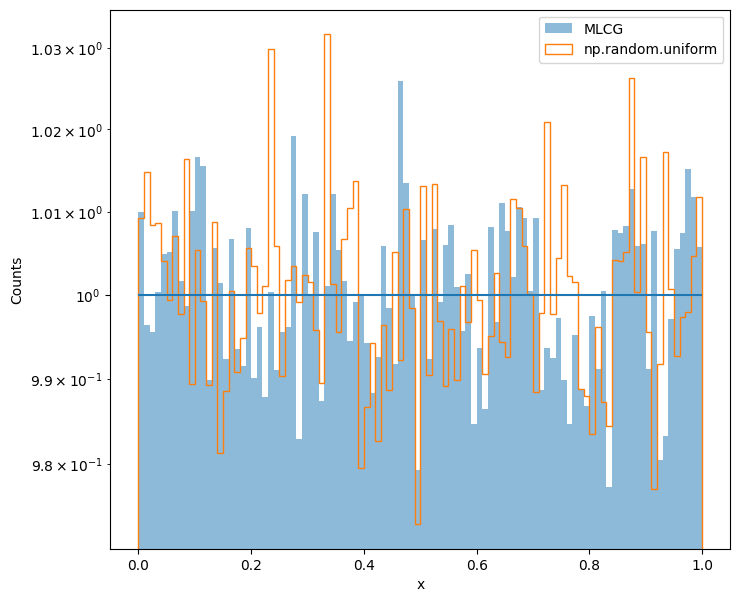

In [2]:
z0 = 10
a = 1664525
b = 1013904223
m = 2*10**32

p = MLCG(z0,a,b,m,10**6)

#print(z0/m)
#print(p[0:10])

np.random.seed(4321) # Fijar a este valor
p2 = np.random.uniform(0.,1.,10**6)

plt.figure(figsize=(8, 7))
plt.hist(p, bins=100, density=True, alpha=0.5, label="MLCG")
plt.hist(p2, bins=100, density=True, histtype='step',linestyle='solid', label="np.random.uniform")
plt.hlines(1.,0.0,1.0)
plt.yscale("log")
plt.ylabel("Counts")
plt.xlabel("x")
plt.legend()
plt.show()

### <font color='green'>**> ENTREGA: Parte 3**</font>

Para un histograma se pueden obtener los contenidos de cada bin usando

```
n, bins, patches = plt.hist(p, bins=100, density=True, alpha=0.5)
```

*n* será un array de 100 elementos que contiene el contenido en *y* de cada uno de los bines. Con esta información podemos calcular la suma de la diferencia absoluta para cada bin entre su contenido y lo esperado por una distribución uniforme (=1.0) para las dos distribuciones de números que has generado. Es decir:

$$
D = \sum_{i=0}^{100} |n_i-1.|
$$

Imprime por pantalla estas "distancias" evaluadas para tus dos distribuciones: $D_{MLCG}$ y $D_{np.random}$. La que tenga menor valor se aproximará más a la distribución uniforme... Puedes anular que se muestre una gráfica usando *plt.close()* en vez de *plt.show()*. **[3 puntos]**


In [3]:
n1, bins1, patches1 = plt.hist(p, bins=100,range=[0,1],density=True, histtype='step',linestyle='solid')
print("D_MLCG = {:.3f}".format(np.sum(np.abs(n1-1.))))

n2, bins2, patches2 = plt.hist(p2,bins=100,range=[0,1],density=True, alpha=0.4)
print("D_np.random = {:.3f}".format(np.sum(np.abs(n2-1.))))
plt.close()

print("D_MLCG se aproxima mejor a la dist. uniforme.")

D_MLCG = 0.788
D_np.random = 0.829
D_MLCG se aproxima mejor a la dist. uniforme.


<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr5_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr5_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>